In [1]:
# Install YOLOv8 (Ultralytics package)
%pip install ultralytics

# Install OpenCV for image processing
%pip install opencv-python opencv-python-headless

# Install NumPy for numerical operations
%pip install numpy

# Install Matplotlib for displaying images
%pip install matplotlib

# Install PyTorch and torchvision (if not installed already)
%pip install torch torchvision --index-url https://download.pytorch.org/whl/cu118  # Use cu118 if you have CUDA 11.8 for GPU acceleration

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [7]:
%pip uninstall google-genai

^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install google-genai


Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install fastapi uvicorn opencv-python-headless numpy


Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install fastapi uvicorn pillow matplotlib opencv-python ultralytics


Note: you may need to restart the kernel to use updated packages.


In [5]:
# Install the required libraries
%pip install ultralytics opencv-python-headless numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install timm

Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install dotenv astrapy

   ---------------------------------------- 0.0/800.1 kB ? eta -:--:--
   ---------------------------------------- 800.1/800.1 kB 8.7 MB/s eta 0:00:00

   ------- --------------------------------  2/11 [python-dotenv]
   ---------- -----------------------------  3/11 [hyperframe]
   ------------------ ---------------------  5/11 [dnspython]
   ------------------ ---------------------  5/11 [dnspython]
   ------------------ ---------------------  5/11 [dnspython]
   ------------------ ---------------------  5/11 [dnspython]
   ------------------ ---------------------  5/11 [dnspython]
   ------------------ ---------------------  5/11 [dnspython]
   ------------------ ---------------------  5/11 [dnspython]
   ------------------ ---------------------  5/11 [dnspython]
   ------------------ ---------------------  5/11 [dnspython]
   ------------------ ---------------------  5/11 [dnspython]
   ------------------ ---------------------  5/11 [dnspython]
   ------------------------- --------

In [ ]:
# Import necessary libraries
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\chatt\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load YOLOv8 model (pre-trained or custom-trained model for leaf disease segmentation)
model = YOLO('D:/User/Downloads/YoloResults/content/runs/segment/train/weights/best.pt')  # Replace with your custom model path if available

In [ ]:
def calculate_severity(mask):
    """
    Calculates the severity percentage using pixel counting.
    """
    # Count diseased pixels (non-zero in the mask) and total leaf pixels
    Pdisease = np.sum(mask > 0)
    Ptotal = mask.size  # Total pixels in the mask
    severity = (Pdisease / Ptotal) * 100

    # Classify severity
    if severity < 20:
        classification = "Mild"
    elif 20 <= severity < 50:
        classification = "Moderate"
    else:
        classification = "Severe"

    return severity, classification


In [ ]:
# Load the input image
image_path = "D:/User/Downloads/trial.jpeg"  # Replace with the path to your input leaf image
image = cv2.imread(image_path)

# Perform inference with YOLOv8
results = model.predict(image, conf=0.5)

# Extract segmentation mask from the results
mask = results[0].masks.data[0].cpu().numpy()  # Assuming a single mask output
annotated_image = results[0].plot()  # Get the annotated image



0: 480x640 2 backgrounds, 1 boundary, 3 diseasess, 179.2ms
Speed: 3.8ms preprocess, 179.2ms inference, 10.9ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
image_path = "D:/User/Downloads/trial.jpeg"  # Ensure this file exists
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Unable to load image from {image_path}. Check the file path.")
else:
    results = model.predict(image, conf=0.5)


0: 480x640 2 backgrounds, 1 boundary, 3 diseasess, 112.0ms
Speed: 1.9ms preprocess, 112.0ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)



0: 480x640 2 backgrounds, 1 boundary, 3 diseasess, 107.0ms
Speed: 2.5ms preprocess, 107.0ms inference, 4.9ms postprocess per image at shape (1, 3, 480, 640)


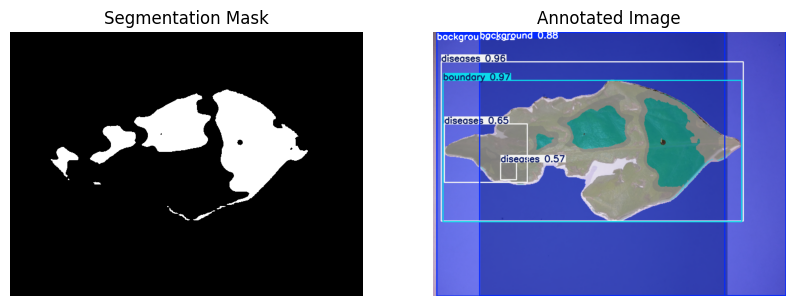

In [ ]:
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO("D:/User/Downloads/YoloResults/content/runs/segment/train/weights/best.pt")  # Replace with your model's path

# Load the input image
image_path = "D:/User/Downloads/trial.jpeg"  # Replace with the path to your input leaf image
image = cv2.imread(image_path)

# Perform inference with YOLOv8
results = model.predict(image, conf=0.5)

# Check if any segmentation masks are available
if results[0].masks is not None and results[0].masks.data is not None:
    # Extract the segmentation mask (assuming the first detected mask)
    mask = results[0].masks.data[0].cpu().numpy()

    # Annotate the image
    annotated_image = results[0].plot()

    # Display the mask and annotated image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Segmentation Mask")
    plt.imshow(mask, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Annotated Image")
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.show()
else:
    print("No segmentation masks were detected in the image.")


0: 480x640 2 backgrounds, 1 boundary, 3 diseasess, 100.6ms
Speed: 3.2ms preprocess, 100.6ms inference, 5.5ms postprocess per image at shape (1, 3, 480, 640)


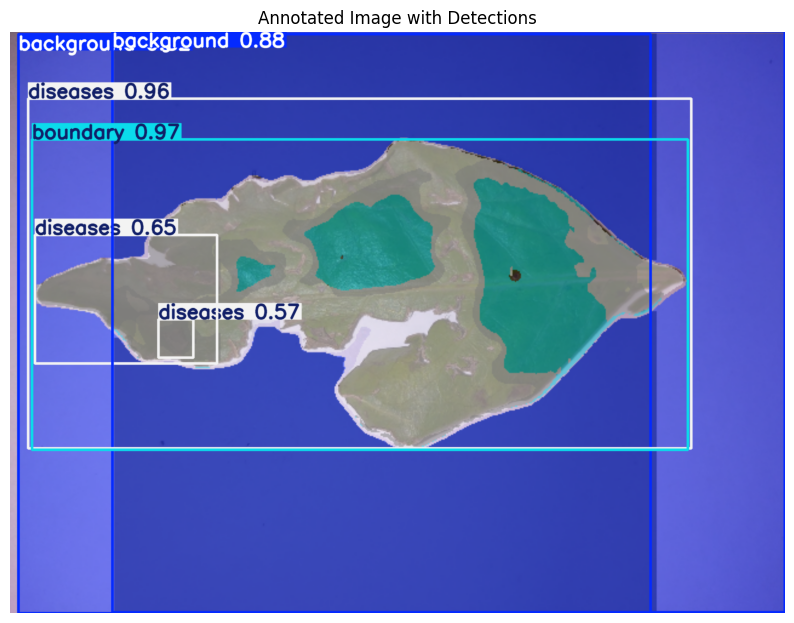

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the YOLOv8 model
#model = YOLO("path_to_yolov8_model.pt")  # Replace with your YOLOv8 model path
model = YOLO('D:/User/Downloads/YoloResults/content/runs/segment/train/weights/best.pt')

# Load the input image
image_path = "D:/User/Downloads/trial.jpeg"  # Replace with the path to your input leaf image
image = cv2.imread(image_path)

# Perform inference with YOLOv8
results = model.predict(image, conf=0.5)

# Check if any detections were made
if results[0].masks is not None:
    # Extract segmentation mask
    masks = results[0].masks.data.cpu().numpy()  # Get all masks as NumPy array
    mask = masks[0]  # Assuming you are working with a single object (first mask)

    # Get annotated image
    annotated_image = results[0].plot()

    # Display the annotated image
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Annotated Image with Detections")
    plt.show()

else:
    print("No detections were made in the image.")

In [ ]:
# Calculate severity and classification
severity, classification = calculate_severity(mask)

print(f"Disease Severity: {severity:.2f}%")
print(f"Severity Classification: {classification}")


Disease Severity: 10.40%
Severity Classification: Mild



0: 640x480 1 background, 1 boundary, 2 diseasess, 131.5ms
Speed: 2.2ms preprocess, 131.5ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 480)


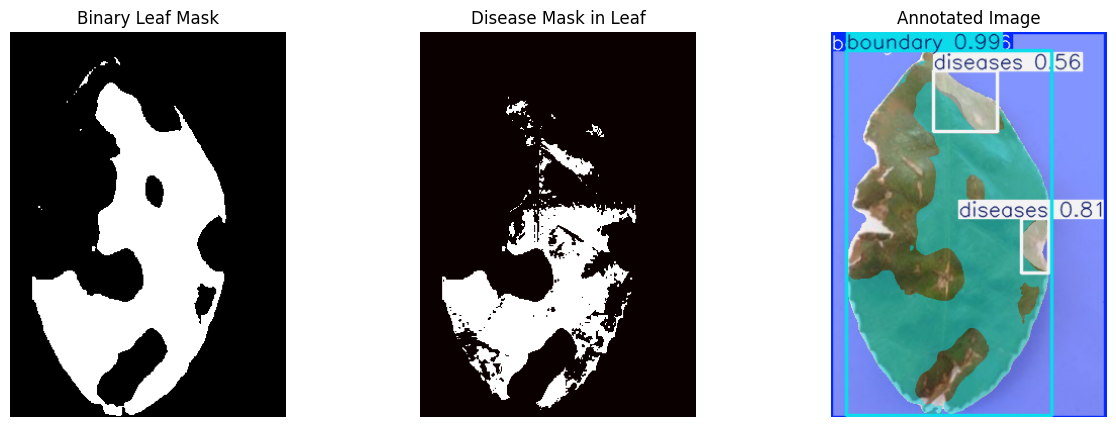

Disease Severity: 57.89%
Severity Classification: Severe


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("D:/User/Downloads/YoloResults/content/runs/segment/train/weights/best.pt")

# Load the input image
image_path = "D:/User/Downloads/trial1.jpeg"
image = cv2.imread(image_path)

# Perform inference
results = model.predict(image, conf=0.5)

# Ensure masks are detected
if results[0].masks is not None and results[0].masks.data is not None:
    # Get the first mask and convert it to NumPy
    mask_tensor = results[0].masks.data[0].cpu().numpy()

    # Resize mask to match original image dimensions
    original_h, original_w = image.shape[:2]
    resized_mask = cv2.resize(mask_tensor, (original_w, original_h), interpolation=cv2.INTER_NEAREST)

    # Convert float mask to binary
    binary_mask = (resized_mask > 0.5).astype(np.uint8)

    # Prepare grayscale version of the original image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create a disease mask (thresholding in leaf region)
    disease_mask = np.zeros_like(binary_mask)
    disease_mask[(binary_mask == 1) & (gray_image < 100)] = 1  # You can tweak the threshold

    # Calculate severity: (diseased pixels) / (leaf pixels only)
    leaf_area = np.sum(binary_mask)
    diseased_pixels = np.sum(disease_mask)
    severity = (diseased_pixels / leaf_area) * 100 if leaf_area > 0 else 0

    # Classification
    if severity < 20:
        classification = "Mild"
    elif severity < 50:
        classification = "Moderate"
    else:
        classification = "Severe"

    # Visualization
    annotated_image = results[0].plot()
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Binary Leaf Mask")
    plt.imshow(binary_mask, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Disease Mask in Leaf")
    plt.imshow(disease_mask, cmap='hot')
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Annotated Image")
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.show()

    print(f"Disease Severity: {severity:.2f}%")
    print(f"Severity Classification: {classification}")

else:
    print("No segmentation masks were detected in the image.")




0: 640x480 1 background, 1 boundary, 2 diseasess, 136.7ms
Speed: 3.2ms preprocess, 136.7ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 480)


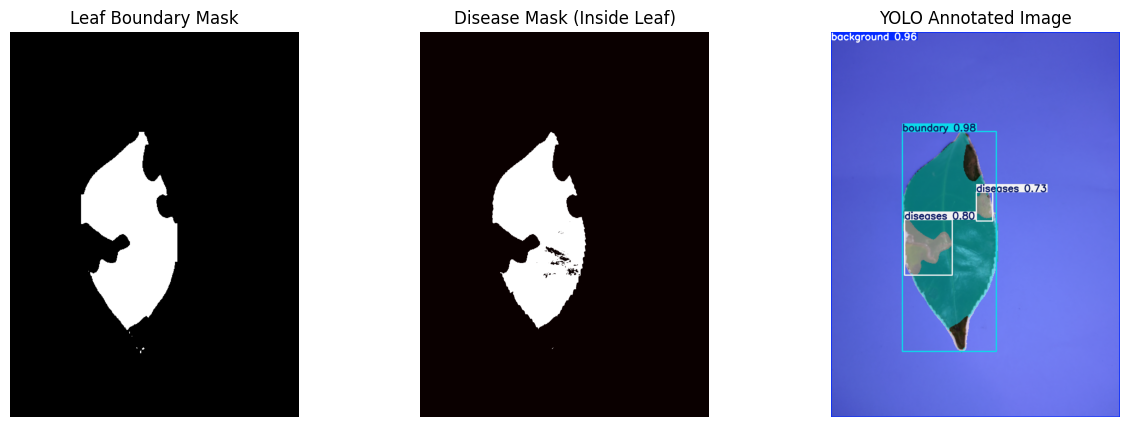

Disease Severity: 94.12%
Severity Classification: Severe


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLOv8 model (leaf segmentation model)
model = YOLO("D:/User/Downloads/YoloResults/content/runs/segment/train/weights/best.pt")

# Load image
image_path = "D:/User/Downloads/trial2.jpeg"
image = cv2.imread(image_path)

# Run inference
results = model.predict(image, conf=0.5)

# Ensure segmentation mask exists
if results[0].masks is not None and results[0].masks.data is not None:
    # Extract mask and resize to original image shape
    mask_tensor = results[0].masks.data[0].cpu().numpy()
    original_h, original_w = image.shape[:2]
    resized_mask = cv2.resize(mask_tensor, (original_w, original_h), interpolation=cv2.INTER_NEAREST)
    
    # Binary mask: 1 for leaf region, 0 for background
    boundary_mask = (resized_mask > 0.5).astype(np.uint8)

    # Convert original image to grayscale (you can switch to HSV or other color space if needed)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect disease pixels: define rule (example: darker regions)
    disease_threshold = 100  # tune this
    disease_mask = np.zeros_like(boundary_mask)
    disease_mask[(boundary_mask == 1) & (gray < disease_threshold)] = 1

    # Count total pixels in leaf (inside boundary) and diseased ones
    total_leaf_pixels = np.sum(boundary_mask)
    diseased_pixels = np.sum(disease_mask)

    # Compute severity
    severity = (diseased_pixels / total_leaf_pixels) * 100 if total_leaf_pixels > 0 else 0

    # Classification
    if severity < 20:
        classification = "Mild"
    elif severity < 50:
        classification = "Moderate"
    else:
        classification = "Severe"

    # Visualization
    annotated_image = results[0].plot()
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Leaf Boundary Mask")
    plt.imshow(boundary_mask, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Disease Mask (Inside Leaf)")
    plt.imshow(disease_mask, cmap='hot')
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("YOLO Annotated Image")
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.show()

    print(f"Disease Severity: {severity:.2f}%")
    print(f"Severity Classification: {classification}")

else:
    print("No segmentation mask found in the prediction.")



0: 480x640 1 background, 2 boundarys, 128.4ms
Speed: 2.7ms preprocess, 128.4ms inference, 4.2ms postprocess per image at shape (1, 3, 480, 640)
Boundary Pixels: 9915
Disease Pixels: 0
Total Leaf Area Pixels: 9915
Severity: 0.00% → Mild


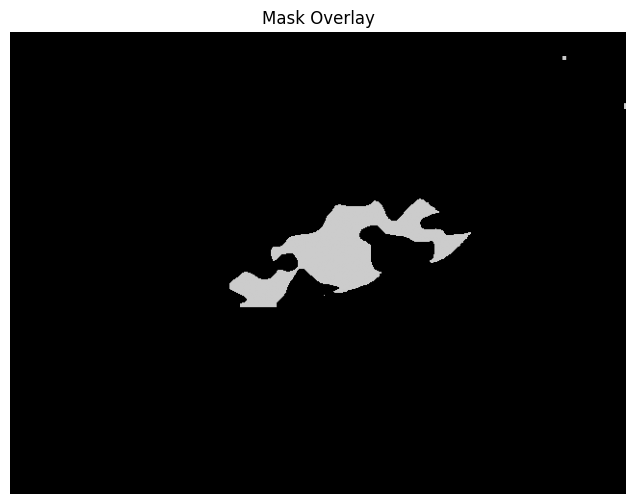

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load model
model = YOLO("D:/User/Downloads/YoloResults/content/runs/segment/train/weights/best.pt")

# Load image
image_path = "D:/User/Downloads/trial 4.jpeg"
image = cv2.imread(image_path)

# Inference
results = model.predict(image, conf=0.5)[0]

# Extract masks and class labels
masks = results.masks  # This is a Masks object
boxes = results.boxes  # This contains the class ids for each mask
names = results.names  # class index -> class name

if masks is not None and masks.data is not None:
    class_ids = boxes.cls.cpu().numpy().astype(int)  # Class for each mask
    mask_data = masks.data.cpu().numpy()  # (N, H, W)

    H, W = mask_data.shape[1:]  # Height and width
    full_mask = np.zeros((H, W), dtype=np.uint8)

    for i, class_id in enumerate(class_ids):
        class_name = names[class_id]
        mask = mask_data[i]

        if "boundary" in class_name.lower():
            full_mask[mask > 0.5] = 1  # Label 1 for boundary
        elif "disease" in class_name.lower():
            full_mask[mask > 0.5] = 2  # Label 2 for disease

    # Count pixels
    boundary_pixels = np.sum(full_mask == 1)
    disease_pixels = np.sum(full_mask == 2)
    total_leaf_area = boundary_pixels + disease_pixels

    # Calculate severity
    severity = (disease_pixels / total_leaf_area) * 100 if total_leaf_area > 0 else 0

    if severity < 20:
        classification = "Mild"
    elif severity < 50:
        classification = "Moderate"
    else:
        classification = "Severe"

    print(f"Boundary Pixels: {boundary_pixels}")
    print(f"Disease Pixels: {disease_pixels}")
    print(f"Total Leaf Area Pixels: {total_leaf_area}")
    print(f"Severity: {severity:.2f}% → {classification}")

    # Optional visualization
    plt.figure(figsize=(8, 6))
    plt.title("Mask Overlay")
    plt.imshow(full_mask, cmap='nipy_spectral')
    plt.axis('off')
    plt.show()
else:
    print("No masks found in the result.")



# Final implementaion


0: 480x640 2 backgrounds, 1 boundary, 4 diseasess, 134.6ms
Speed: 2.9ms preprocess, 134.6ms inference, 5.8ms postprocess per image at shape (1, 3, 480, 640)
Boundary pixels: 19073
Disease pixels: 52218
Total leaf pixels: 71291
Severity: 73.25%
Severity Classification: Severe


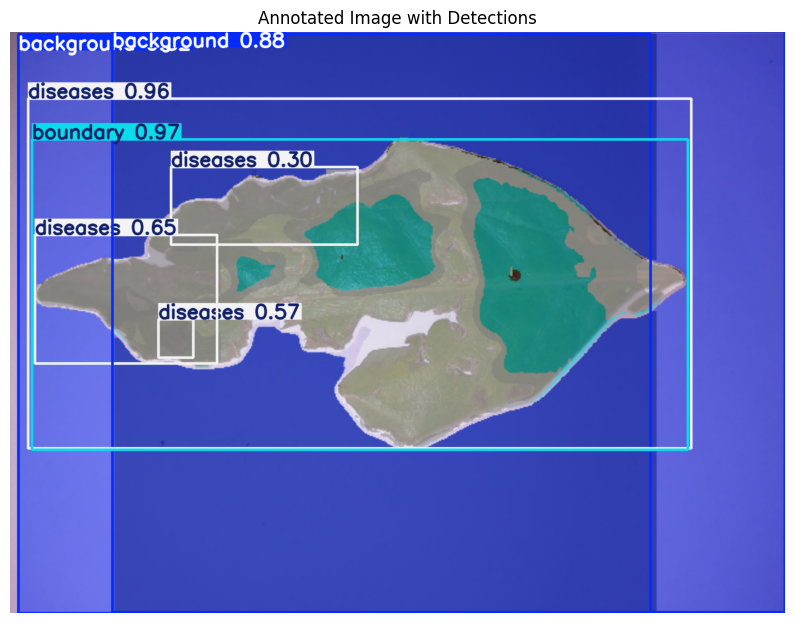

In [ ]:
from ultralytics import YOLO
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load model
model = YOLO("D:/User/Downloads/YoloResults/content/runs/segment/train/weights/best.pt")
#model2 = YOLO("D:/User/Downloads/YoloResults1 (2)/content/runs\segment/train/weights/best.pt")
#model3 = YOLO("D:/User/Downloads/YoloResults1 (3)/content/runs\segment/train/weights/best.pt")


# Load image
image_path = "D:/User/Downloads/trial.jpeg"  # Replace with your image path
image = cv2.imread(image_path)

# Predict
results = model.predict(image)  # Adjust confidence threshold as needed
result = results[0]  # For single image

# Check for masks
if result.masks is not None and result.masks.data is not None:
    masks = result.masks.data.cpu().numpy()  # Shape: (N, H, W)
    class_ids = result.boxes.cls.cpu().numpy().astype(int)  # Shape: (N,)
    names = result.names  # {0: 'background', 1: 'boundary', 2: 'diseases'}

    # Create a blank canvas for final classwise mask
    final_mask = np.zeros_like(masks[0], dtype=np.uint8)

    # Assign each mask a label (1 for boundary, 2 for diseases)
    for i in range(len(masks)):
        mask = masks[i] > 0.5
        class_id = class_ids[i]
        class_name = names[class_id]

        if class_name == "boundary":
            final_mask[mask] = 1
        elif class_name == "diseases":
            final_mask[mask] = 2

    # Calculate areas
    boundary_pixels = np.sum(final_mask == 1)
    disease_pixels = np.sum(final_mask == 2)
    total_leaf_area = boundary_pixels + disease_pixels

    # Calculate severity
    severity = (disease_pixels / total_leaf_area) * 100 if total_leaf_area > 0 else 0


    if severity < 20:
        classification = "Mild"
    elif severity < 50:
        classification = "Moderate"
    else:
        classification = "Severe"
    # Print stats
    print(f"Boundary pixels: {boundary_pixels}")
    print(f"Disease pixels: {disease_pixels}")
    print(f"Total leaf pixels: {total_leaf_area}")
    print(f"Severity: {severity:.2f}%")
    print(f"Severity Classification: {classification}")


    # Display annotated image
    annotated = result.plot()
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Annotated Image with Detections")
    plt.show()


else:
    print("No detections were made in the image.")




0: 480x640 2 backgrounds, 1 boundary, 4 diseasess, 98.6ms
Speed: 2.5ms preprocess, 98.6ms inference, 5.1ms postprocess per image at shape (1, 3, 480, 640)
Boundary pixels: 19073
Disease pixels: 52218
Total leaf pixels: 71291
Severity: 73.25%
Severity Classification: Severe


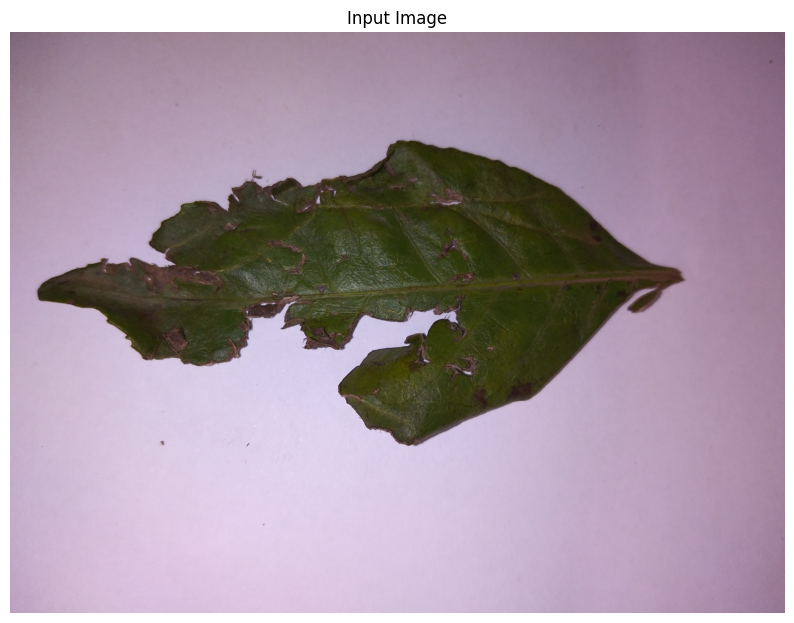

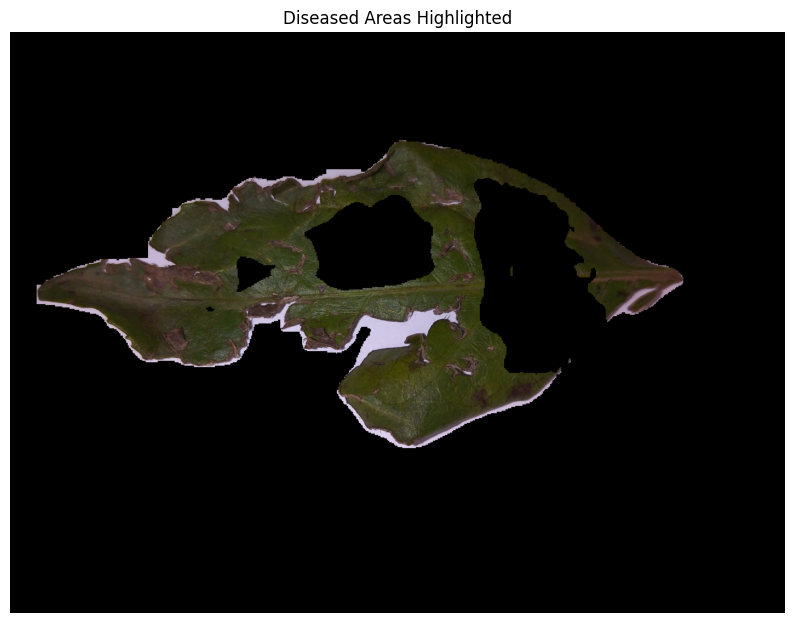

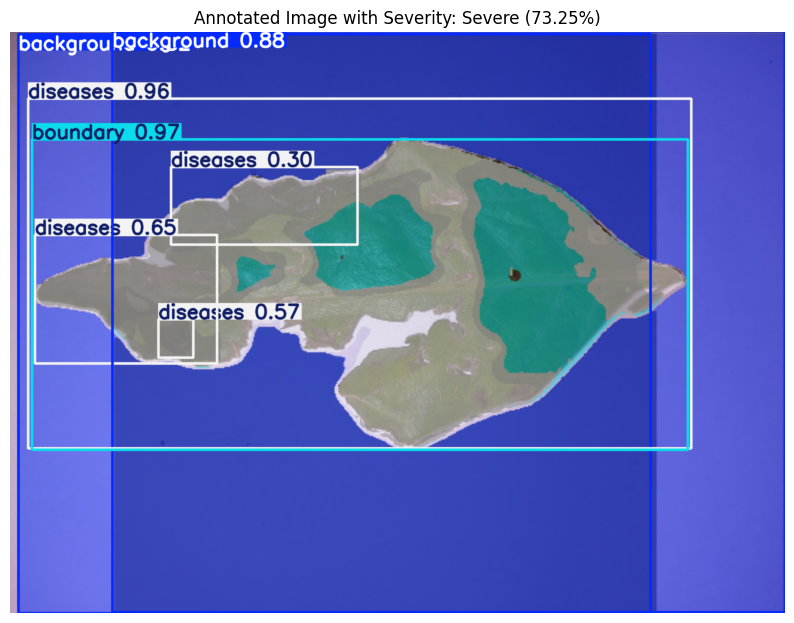

In [ ]:
from ultralytics import YOLO
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load models
model = YOLO("D:/User/Downloads/YoloResults/content/runs/segment/train/weights/best.pt")


# Load image
image_path = "D:/User/Downloads/trial.jpeg"  # Replace with your image path
image = cv2.imread(image_path)

# Predict
results = model.predict(image)  # Adjust confidence threshold as needed
result = results[0]  # For single image

# Check for masks
if result.masks is not None and result.masks.data is not None:
    masks = result.masks.data.cpu().numpy()  # Shape: (N, H, W)
    class_ids = result.boxes.cls.cpu().numpy().astype(int)  # Shape: (N,)
    names = result.names  # {0: 'background', 1: 'boundary', 2: 'diseases'}

    # Create a blank canvas for final classwise mask
    final_mask = np.zeros_like(masks[0], dtype=np.uint8)

    # Assign each mask a label (1 for boundary, 2 for diseases)
    for i in range(len(masks)):
        mask = masks[i] > 0.5
        class_id = class_ids[i]
        class_name = names[class_id]

        if class_name == "boundary":
            final_mask[mask] = 1
        elif class_name == "diseases":
            final_mask[mask] = 2

    # Calculate areas
    boundary_pixels = np.sum(final_mask == 1)
    disease_pixels = np.sum(final_mask == 2)
    total_leaf_area = boundary_pixels + disease_pixels

    # Calculate severity
    '''
    severity = (disease_pixels / total_leaf_area) * 100 if total_leaf_area > 0 else 0

    if severity < 20:
        classification = "Mild"
    elif severity < 50:
        classification = "Moderate"
    else:
        classification = "Severe"
    '''

    severity = int((disease_pixels / total_leaf_area) * 100) if total_leaf_area > 0 else 0

    segmentation_classification = (
        "Healthy" if severity <= 5 else
        "Mild" if severity <= 20 else
        "Moderate" if severity <= 50 else
        "Severe" if severity <= 100 else
        "Healthy"
    )   

    # Print stats
    print(f"Boundary pixels: {boundary_pixels}")
    print(f"Disease pixels: {disease_pixels}")
    print(f"Total leaf pixels: {total_leaf_area}")
    print(f"Severity: {severity:.2f}%")
    print(f"Severity Classification: {classification}")

    # Display input image
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Input Image")
    plt.show()

    # Display diseased parts of the image
    diseased_mask = final_mask == 2
    diseased_mask_resized = cv2.resize(diseased_mask.astype(np.uint8), (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

    diseased_image = np.zeros_like(image)
    for c in range(3):  # Apply mask on all channels
        diseased_image[:, :, c] = image[:, :, c] * diseased_mask_resized

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(diseased_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Diseased Areas Highlighted")
    plt.show()

    # Display annotated image
    annotated = result.plot()
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Annotated Image with Severity: {classification} ({severity:.2f}%)")
    plt.show()

else:
    print("No detections were made in the image.")
